# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(study_results, mouse_metadata, on=["Mouse ID"])
# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [20]:
# Checking the number of mice.
mice_number = combined_data["Mouse ID"].nunique()
mice_number

249

In [21]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_time = combined_data[combined_data[['Timepoint','Mouse ID']].duplicated()]
duplicate_mice_ID = duplicate_mice_time["Mouse ID"].unique()
duplicate_mice_ID

array(['g989'], dtype=object)

In [22]:
# Optional: Get all the data for the duplicate mouse ID. 
all_mice_data = combined_data[combined_data["Mouse ID"] == "g989"]
all_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [23]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Get the index for all the rows that need to be dropped
ID_index = all_mice_data.index
# New DataFrame with dropped rows
new_combined_data = combined_data.drop(index = ID_index)
new_combined_data.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [24]:
# Checking the number of mice in the clean DataFrame.
new_mice_number = new_combined_data["Mouse ID"].nunique()
new_mice_number

248

## Summary Statistics

In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Generate a new table with the desired columns
tumor = new_combined_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)']

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:

# mean
tumor_vol_mean = tumor.mean()
# median
tumor_vol_median = tumor.median()
# variance 
tumor_vol_variance = tumor.var()
# standard deviation
tumor_vol_stdev = tumor.std()
# SEM
tumor_vol_sem = tumor.sem()


# Assemble the resulting series into a single summary DataFrame.
tumor_vol_data = pd.DataFrame({"Mean Tumor Volume": tumor_vol_mean, "Median Tumor Volume": tumor_vol_median, "Variance Tumor Volume": tumor_vol_variance, "Std. Dev. Tumor Volume": tumor_vol_stdev, "Std. Err. Tumor Volume":tumor_vol_sem})
tumor_vol_data


,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Std. Dev. Tumor Volume,Std. Err. Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

tumor_agg = new_combined_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']]

# Using the aggregation method, produce the same summary statistics in a single line.
agg_tumor_vol_data = tumor_agg.agg(['mean','median','var','std','sem'])
agg_tumor_vol_data

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

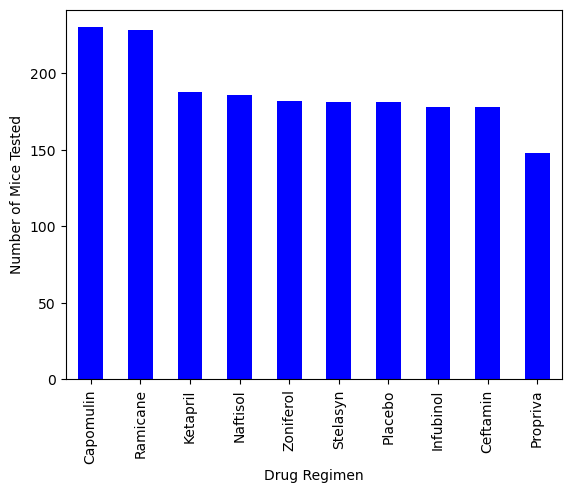

In [27]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# Generate desired values of mice
num_tested_mice = new_combined_data["Drug Regimen"].value_counts()

# Plot on a bar graph
pandas_bar_chart = num_tested_mice.plot.bar(color='b')

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")



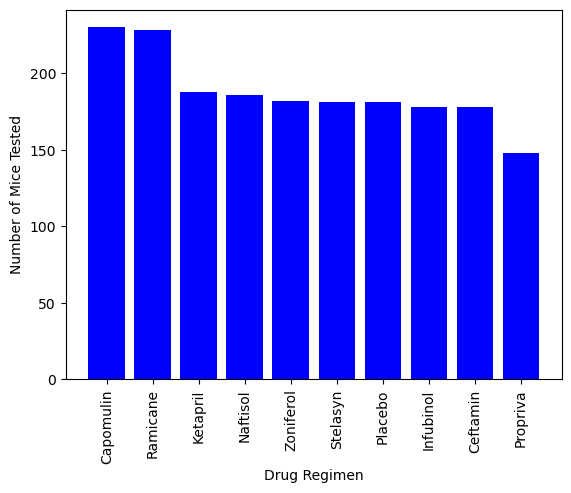

In [28]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = num_tested_mice.index
y_axis = num_tested_mice.values

pyplot_plot = plt.bar(x_axis,y_axis,color='b')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation="vertical")

plt.show()

<AxesSubplot:ylabel='Sex'>

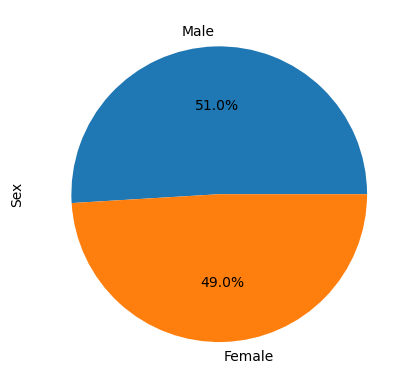

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Get the number of male and female mice
gender_num = new_combined_data['Sex'].value_counts()
gender_num.plot.pie(autopct= "%1.1f%%")

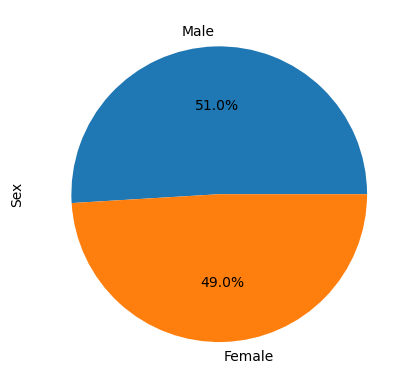

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male', 'Female']
female = len(new_combined_data[new_combined_data["Sex"] == "Female"])
male = len(new_combined_data[new_combined_data["Sex"] == "Male"])
total = female + male
percent_female = female/total *100
percent_male = male/total *100
sizes = [percent_male,percent_female]
plt.pie(sizes,labels = labels,autopct="%1.1f%%")
plt.ylabel('Sex')

plt.show()


## Quartiles, Outliers and Boxplots

In [59]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
cap_final_time = new_combined_data[new_combined_data["Drug Regimen"] =='Capomulin']
cap_great_time = cap_final_time.groupby(['Mouse ID'])['Timepoint'].max()
cap_data = pd.DataFrame(cap_great_time)
cap_merge = pd.merge(cap_data,new_combined_data,on = ['Mouse ID','Timepoint'])

ram_final_time = new_combined_data[new_combined_data["Drug Regimen"] =='Ramicane']
ram_great_time = ram_final_time.groupby(['Mouse ID'])['Timepoint'].max()
ram_data = pd.DataFrame(ram_great_time)
ram_merge = pd.merge(ram_data,new_combined_data,on = ['Mouse ID','Timepoint'])

inf_final_time = new_combined_data[new_combined_data["Drug Regimen"] =='Infubinol']
inf_great_time = inf_final_time.groupby(['Mouse ID'])['Timepoint'].max()
inf_data = pd.DataFrame(inf_great_time)
inf_merge = pd.merge(inf_data,new_combined_data,on = ['Mouse ID','Timepoint'])

cef_final_time = new_combined_data[new_combined_data["Drug Regimen"] =='Ceftamin']
cef_great_time = cef_final_time.groupby(['Mouse ID'])['Timepoint'].max()
cef_data = pd.DataFrame(cef_great_time)
cef_merge = pd.merge(cef_data,new_combined_data,on = ['Mouse ID','Timepoint'])


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint




In [49]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [33]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

In [34]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



In [35]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

In [36]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

